# Lab 5 - Joining Uber Pick-Ups, Stations, and Boroughs

In [Lecture 3.4](./3_4_joining_large_and_small_files.ipynb), we introduced using a Python `dict` to join a large and small table.  In this lab, we will practice this technique on the uber data set.

**Note:** Make sure that you download and unzip the file `Uber-Jan-Feb-FOIL.csv` before proceeding.

In [2]:
import pandas as pd
from dfply import *

In [3]:
c_size = 500000
trips = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-janjune-15.csv", chunksize=c_size)
first_chunk = next(trips)

In [4]:
first_chunk.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


## <font color="red"> Problem 1 - Creating 2 Location `dict`</font>

Read the file `taxi-zone-lookup.csv` and inspect the columns. What 2 pieces of information will this file allow us to add to the `uber-raw-data-janjune-15.csv`?  Make a `dict` for each of these variables.

> *Your thoughts here*

In [5]:
# Your code here

In [8]:
lookup = pd.read_csv("./data/uber/uber-trip-data/taxi-zone-lookup.csv")
lookup.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


In [9]:
borough = {iD:name for iD, name in zip(lookup.LocationID, lookup.Borough)}
borough

{1: 'EWR',
 2: 'Queens',
 3: 'Bronx',
 4: 'Manhattan',
 5: 'Staten Island',
 6: 'Staten Island',
 7: 'Queens',
 8: 'Queens',
 9: 'Queens',
 10: 'Queens',
 11: 'Brooklyn',
 12: 'Manhattan',
 13: 'Manhattan',
 14: 'Brooklyn',
 15: 'Queens',
 16: 'Queens',
 17: 'Brooklyn',
 18: 'Bronx',
 19: 'Queens',
 20: 'Bronx',
 21: 'Brooklyn',
 22: 'Brooklyn',
 23: 'Staten Island',
 24: 'Manhattan',
 25: 'Brooklyn',
 26: 'Brooklyn',
 27: 'Queens',
 28: 'Queens',
 29: 'Brooklyn',
 30: 'Queens',
 31: 'Bronx',
 32: 'Bronx',
 33: 'Brooklyn',
 34: 'Brooklyn',
 35: 'Brooklyn',
 36: 'Brooklyn',
 37: 'Brooklyn',
 38: 'Queens',
 39: 'Brooklyn',
 40: 'Brooklyn',
 41: 'Manhattan',
 42: 'Manhattan',
 43: 'Manhattan',
 44: 'Staten Island',
 45: 'Manhattan',
 46: 'Bronx',
 47: 'Bronx',
 48: 'Manhattan',
 49: 'Brooklyn',
 50: 'Manhattan',
 51: 'Bronx',
 52: 'Brooklyn',
 53: 'Queens',
 54: 'Brooklyn',
 55: 'Brooklyn',
 56: 'Queens',
 57: 'Queens',
 58: 'Bronx',
 59: 'Bronx',
 60: 'Bronx',
 61: 'Brooklyn',
 62: 'Broo

In [10]:
zone = {iD:name for iD, name in zip(lookup.LocationID, lookup.Zone)}
zone

{1: 'Newark Airport',
 2: 'Jamaica Bay',
 3: 'Allerton/Pelham Gardens',
 4: 'Alphabet City',
 5: 'Arden Heights',
 6: 'Arrochar/Fort Wadsworth',
 7: 'Astoria',
 8: 'Astoria Park',
 9: 'Auburndale',
 10: 'Baisley Park',
 11: 'Bath Beach',
 12: 'Battery Park',
 13: 'Battery Park City',
 14: 'Bay Ridge',
 15: 'Bay Terrace/Fort Totten',
 16: 'Bayside',
 17: 'Bedford',
 18: 'Bedford Park',
 19: 'Bellerose',
 20: 'Belmont',
 21: 'Bensonhurst East',
 22: 'Bensonhurst West',
 23: 'Bloomfield/Emerson Hill',
 24: 'Bloomingdale',
 25: 'Boerum Hill',
 26: 'Borough Park',
 27: 'Breezy Point/Fort Tilden/Riis Beach',
 28: 'Briarwood/Jamaica Hills',
 29: 'Brighton Beach',
 30: 'Broad Channel',
 31: 'Bronx Park',
 32: 'Bronxdale',
 33: 'Brooklyn Heights',
 34: 'Brooklyn Navy Yard',
 35: 'Brownsville',
 36: 'Bushwick North',
 37: 'Bushwick South',
 38: 'Cambria Heights',
 39: 'Canarsie',
 40: 'Carroll Gardens',
 41: 'Central Harlem',
 42: 'Central Harlem North',
 43: 'Central Park',
 44: 'Charleston/Tot

## <font color="red"> Problem 2 - Dispatch Translation</font>

The following table was taken from the FiveThirtyEight github page and contains the names of each Uber dispatch station.  Create a translation `dict` for these data.

Base Code | Base Name
---|---------
B02512 | Unter
B02598 | Hinter
B02617 | Weiter
B02682 | Schmecken
B02764 | Danach-NY
B02765 | Grun
B02835 | Dreist
B02836 | Drinnen

In [11]:
# Your code here

In [12]:
base = {code:name for code, name in zip(['B02512','B02598','B02617','B02682','B02764','B02765','B02835','B02836'],
                                        ['Unter', 'Hinter', 'Weiter', 'Schmecken', 'Danach-NY', 'Grun', 'Dreist', 'Drinnen'])}
base
                                        

{'B02512': 'Unter',
 'B02598': 'Hinter',
 'B02617': 'Weiter',
 'B02682': 'Schmecken',
 'B02764': 'Danach-NY',
 'B02765': 'Grun',
 'B02835': 'Dreist',
 'B02836': 'Drinnen'}

## <font color="red"> Problem 3 - Prototyping a Helper Function</font>

Use the first chunk to prototype a helper function that

1. Add three new columns, one for each key/translation.
2. Drop each of the associated keys.
3. Convert the `pickup_date` to a datetime column.
4. Add various datepart columns

This function should use appropriate `dfply` functions and a pipe.

In [ ]:
borough = {iD:name for iD, name in zip(lookup.LocationID, lookup.Borough)}

In [16]:
first_chunk.Dispatching_base_num.map(base).head()

0    Weiter
1    Weiter
2    Weiter
3    Weiter
4    Weiter
Name: Dispatching_base_num, dtype: object

In [35]:
from more_dfply import recode, to_datetime

(first_chunk 
 >>  mutate(Dispatching_base_name = recode(X.Dispatching_base_num, base),
            Affiliated_base_name = recode(X.Affiliated_base_num, base),
            Zone = recode(X.locationID, zone),
            Borough = recode(X.locationID, borough),
            Pickup_date = to_datetime(X.Pickup_date))
 >> mutate(hour = X.Pickup_date.dt.hour,
           weekday_name = X.Pickup_date.dt.weekday_name,
           dayofyear = X.Pickup_date.dt.dayofyear,
           weekofyear = X.Pickup_date.dt.weekofyear)
 >> drop(X.Dispatching_base_num, X.Affiliated_base_num, X.locationID)
 >> head)

,Pickup_date,Dispatching_base_name,Affiliated_base_name,Zone,Borough,hour,weekday_name,dayofyear,weekofyear
0,2015-05-17 09:47:00,Weiter,Weiter,Lenox Hill West,Manhattan,9,Sunday,137,20
1,2015-05-17 09:47:00,Weiter,Weiter,Downtown Brooklyn/MetroTech,Brooklyn,9,Sunday,137,20
2,2015-05-17 09:47:00,Weiter,Weiter,Garment District,Manhattan,9,Sunday,137,20
3,2015-05-17 09:47:00,Weiter,NaN,East Williamsburg,Brooklyn,9,Sunday,137,20
4,2015-05-17 09:47:00,Weiter,Weiter,Flatiron,Manhattan,9,Sunday,137,20


In [37]:
from more_dfply import recode, to_datetime
from functoolz import pipeable

recode_chunk = pipeable(lambda df: (df 
                                    >>  mutate(Dispatching_base_name = recode(X.Dispatching_base_num, base),
                                            Affiliated_base_name = recode(X.Affiliated_base_num, base),
                                            Zone = recode(X.locationID, zone),
                                            Borough = recode(X.locationID, borough),
                                            Pickup_date = to_datetime(X.Pickup_date))))
first_chunk >> recode_chunk >> head

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Dispatching_base_name,Affiliated_base_name,Zone,Borough
0,B02617,2015-05-17 09:47:00,B02617,141,Weiter,Weiter,Lenox Hill West,Manhattan
1,B02617,2015-05-17 09:47:00,B02617,65,Weiter,Weiter,Downtown Brooklyn/MetroTech,Brooklyn
2,B02617,2015-05-17 09:47:00,B02617,100,Weiter,Weiter,Garment District,Manhattan
3,B02617,2015-05-17 09:47:00,B02774,80,Weiter,NaN,East Williamsburg,Brooklyn
4,B02617,2015-05-17 09:47:00,B02617,90,Weiter,Weiter,Flatiron,Manhattan


In [84]:
add_dateparts = pipeable(lambda df: (df
                                     >> mutate(hour = X.Pickup_date.dt.hour,
                                               weekday_name = X.Pickup_date.dt.weekday_name,
                                               dayofyear = X.Pickup_date.dt.dayofyear,
                                               weekofyear = X.Pickup_date.dt.weekofyear)
                                     >> drop(X.Dispatching_base_num, 
                                             X.Affiliated_base_num, 
                                             X.locationID,
                                             X.Pickup_date)))

first_chunk >> recode_chunk >> add_dateparts >> head

,Dispatching_base_name,Affiliated_base_name,Zone,Borough,hour,weekday_name,dayofyear,weekofyear
0,Weiter,Weiter,Lenox Hill West,Manhattan,9,Sunday,137,20
1,Weiter,Weiter,Downtown Brooklyn/MetroTech,Brooklyn,9,Sunday,137,20
2,Weiter,Weiter,Garment District,Manhattan,9,Sunday,137,20
3,Weiter,NaN,East Williamsburg,Brooklyn,9,Sunday,137,20
4,Weiter,Weiter,Flatiron,Manhattan,9,Sunday,137,20


In [85]:
add_primary_key = pipeable(lambda start, df: (df
                                              >> mutate(id = np.arange(start, start + len(df))
                                              )))

process_chunk = pipeable(lambda i, df, chunksize=c_size: (df 
                                                          >> recode_chunk
                                                          >> add_dateparts 
                                                          >> add_primary_key(i*c_size)))

processed_first_chunk = first_chunk >> process_chunk(0, chunksize=c_size)
processed_first_chunk >> head

,Dispatching_base_name,Affiliated_base_name,Zone,Borough,hour,weekday_name,dayofyear,weekofyear,id
0,Weiter,Weiter,Lenox Hill West,Manhattan,9,Sunday,137,20,0
1,Weiter,Weiter,Downtown Brooklyn/MetroTech,Brooklyn,9,Sunday,137,20,1
2,Weiter,Weiter,Garment District,Manhattan,9,Sunday,137,20,2
3,Weiter,NaN,East Williamsburg,Brooklyn,9,Sunday,137,20,3
4,Weiter,Weiter,Flatiron,Manhattan,9,Sunday,137,20,4


In [100]:
!rm ./databases/uber_lab_5.db

In [101]:
from more_sqlalchemy import get_sql_types

sql_type = get_sql_types(processed_first_chunk)
sql_type

{'Dispatching_base_name': sqlalchemy.sql.sqltypes.String,
 'Affiliated_base_name': sqlalchemy.sql.sqltypes.String,
 'Zone': sqlalchemy.sql.sqltypes.String,
 'Borough': sqlalchemy.sql.sqltypes.String,
 'hour': sqlalchemy.sql.sqltypes.Integer,
 'weekday_name': sqlalchemy.sql.sqltypes.String,
 'dayofyear': sqlalchemy.sql.sqltypes.Integer,
 'weekofyear': sqlalchemy.sql.sqltypes.Integer,
 'id': sqlalchemy.sql.sqltypes.Integer}

## <font color="red"> Problem 4 - Creating a SQL database</font>

Use `pandas` and your helper function to create a `sqlite` database for this file.

In [ ]:
# Your code here

In [102]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///databases/uber_lab_5.db', echo=False)

In [103]:
schema = pd.io.sql.get_schema(processed_first_chunk, # dataframe
                              'janjune15', # name in SQL db
                              keys='id', # primary key
                              con=engine, # connection
                              dtype=sql_type # SQL types
)
print(schema)
engine.execute(schema)


CREATE TABLE janjune15 (
	"Dispatching_base_name" VARCHAR, 
	"Affiliated_base_name" VARCHAR, 
	"Zone" VARCHAR, 
	"Borough" VARCHAR, 
	hour INTEGER, 
	weekday_name VARCHAR, 
	dayofyear INTEGER, 
	weekofyear INTEGER, 
	id INTEGER NOT NULL, 
	CONSTRAINT janjune15_pk PRIMARY KEY (id)
)




In [104]:
c_size = 500000
trips = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-janjune-15.csv", chunksize=c_size)

In [105]:
for i, chunk in enumerate(trips):
    processed_chunk = chunk >> process_chunk(i)
    print('writing chunk {0}'.format(i, chunksize=c_size))
    processed_chunk.to_sql('janjune15', 
                           con=engine, 
                           dtype=sql_type, 
                           index=False,
                           if_exists='append')

writing chunk 0
writing chunk 1
writing chunk 2
writing chunk 3
writing chunk 4
writing chunk 5
writing chunk 6
writing chunk 7
writing chunk 8
writing chunk 9
writing chunk 10
writing chunk 11
writing chunk 12
writing chunk 13
writing chunk 14
writing chunk 15
writing chunk 16
writing chunk 17
writing chunk 18
writing chunk 19
writing chunk 20
writing chunk 21
writing chunk 22
writing chunk 23
writing chunk 24
writing chunk 25
writing chunk 26
writing chunk 27
writing chunk 28


In [15]:
def zipDict(keys, values):
    return {key:val for key, val in zip(keys, values)}
borough = zipDict(lookup.LocationID, lookup.Borough)
borough

{1: 'EWR',
 2: 'Queens',
 3: 'Bronx',
 4: 'Manhattan',
 5: 'Staten Island',
 6: 'Staten Island',
 7: 'Queens',
 8: 'Queens',
 9: 'Queens',
 10: 'Queens',
 11: 'Brooklyn',
 12: 'Manhattan',
 13: 'Manhattan',
 14: 'Brooklyn',
 15: 'Queens',
 16: 'Queens',
 17: 'Brooklyn',
 18: 'Bronx',
 19: 'Queens',
 20: 'Bronx',
 21: 'Brooklyn',
 22: 'Brooklyn',
 23: 'Staten Island',
 24: 'Manhattan',
 25: 'Brooklyn',
 26: 'Brooklyn',
 27: 'Queens',
 28: 'Queens',
 29: 'Brooklyn',
 30: 'Queens',
 31: 'Bronx',
 32: 'Bronx',
 33: 'Brooklyn',
 34: 'Brooklyn',
 35: 'Brooklyn',
 36: 'Brooklyn',
 37: 'Brooklyn',
 38: 'Queens',
 39: 'Brooklyn',
 40: 'Brooklyn',
 41: 'Manhattan',
 42: 'Manhattan',
 43: 'Manhattan',
 44: 'Staten Island',
 45: 'Manhattan',
 46: 'Bronx',
 47: 'Bronx',
 48: 'Manhattan',
 49: 'Brooklyn',
 50: 'Manhattan',
 51: 'Bronx',
 52: 'Brooklyn',
 53: 'Queens',
 54: 'Brooklyn',
 55: 'Brooklyn',
 56: 'Queens',
 57: 'Queens',
 58: 'Bronx',
 59: 'Bronx',
 60: 'Bronx',
 61: 'Brooklyn',
 62: 'Broo

## <font color="red"> Problem 5 - Exploring the pickups</font>

**Question of Interest:** I am interested in difference between pick-ups in terms of both time and Borough.  Use aggregation and visualizations to construct a group that illustrates an interesting difference between the Boroughs.

In [106]:
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

engine = create_engine("sqlite:///databases/uber_lab_5.db")

Base = automap_base()
Base.prepare(engine, reflect=True)
janjune15 = Base.classes.janjune15

In [118]:
import dfply_sql as q
from dfply_sql import T

borough_weekday = (janjune15
                   >> q.to_statement
                   >> q.select([T.Borough, T.weekday_name])
                   >> q.group_by([T.Borough, T.weekday_name])
                   >> q.summarise(cnt = q.func.count(T.Borough))
                   >> q.pprint
                   >> q.to_pandas(engine)
                  )

SELECT janjune15."Borough",
       janjune15.weekday_name,
       count(janjune15."Borough") AS cnt
FROM janjune15
GROUP BY janjune15."Borough",
         janjune15.weekday_name


In [133]:
from calendar import day_name
w = [d for d in day_name]
wd = {n:i for i, n in enumerate(w)}
wd

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [140]:
from dfply import *
borough_weekday_prop = (borough_weekday
                        >> group_by(X.Borough)
                        >> mutate(tot = X.cnt.sum())
                        >> mutate(prop = X.cnt/X.tot)
                        >> mutate(ord = X.weekday_name.map(wd))
                        >> ungroup
                        >> arrange(X.Borough, X.weekday_name)
                       )
borough_weekday_prop.head()

,Borough,weekday_name,cnt,tot,prop,ord
0,Bronx,Friday,35557,220146,0.161516,4
1,Bronx,Monday,25799,220146,0.117190,0
2,Bronx,Saturday,41122,220146,0.186794,5
3,Bronx,Sunday,35114,220146,0.159503,6
4,Bronx,Thursday,29276,220146,0.132984,3


In [123]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

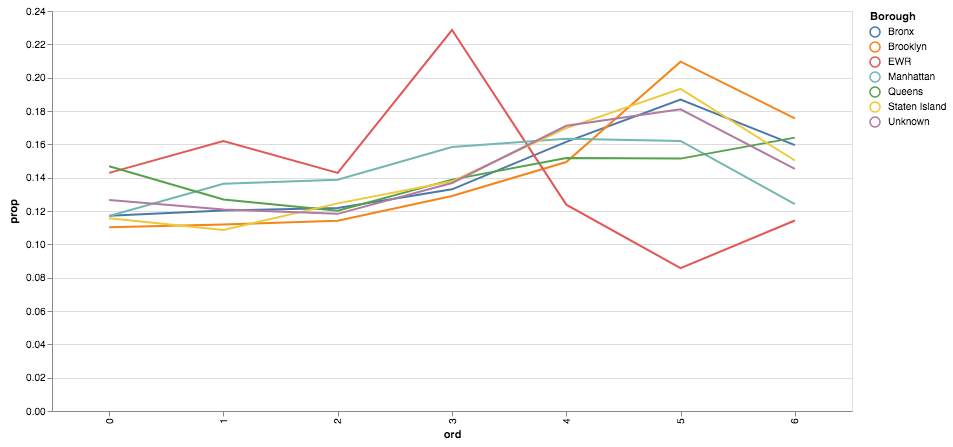

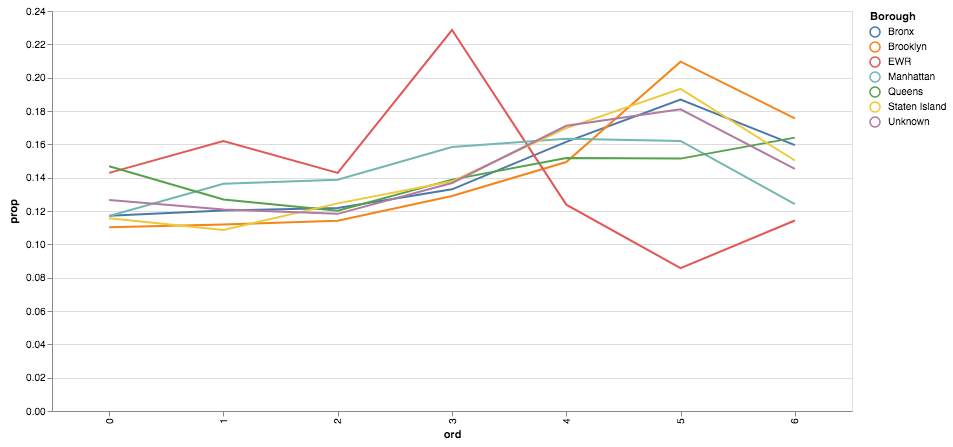

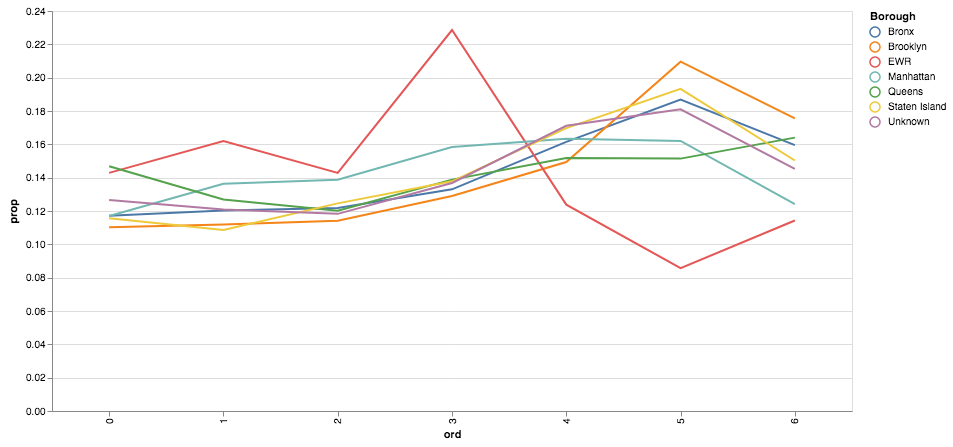

In [148]:
(alt.Chart(borough_weekday_prop) 
 .mark_line().encode(x = alt.X('ord:O'),
                     y = 'prop',
                     color = 'Borough')
 .properties(width=800, height = 400))